In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r"D:\data analyst\projects & internships\0.  internships scn n enroll\2. Accenture\rw Reactions.csv")
df

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
...,...,...,...,...,...
25548,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48
25549,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02
25550,25550,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,interested,2020-09-12 03:54:58
25551,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31


In [3]:
# List of column names to be deleted
columns_to_delete = ['Unnamed: 0']  # Replace with the actual column names

# Drop the specified columns
df.drop(columns=columns_to_delete, inplace=True)

In [4]:
print(df.dtypes)


Content ID    object
User ID       object
Type          object
Datetime      object
dtype: object


In [5]:
df['Type'] = pd.Categorical(df['Type'])
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Content ID  25553 non-null  object        
 1   User ID     22534 non-null  object        
 2   Type        24573 non-null  category      
 3   Datetime    25553 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), object(2)
memory usage: 624.6+ KB


In [7]:
ndc = non_duplicates_count = (~df.duplicated()).sum()

ndc

25553

In [8]:
# ndc != Total number of columns, Implies that there are duplicates.
df.drop_duplicates(inplace=True) 


In [9]:
df.isnull()


,Content ID,User ID,Type,Datetime
0,False,True,True,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
25548,False,False,False,False
25549,False,False,False,False
25550,False,True,False,False
25551,False,False,False,False


In [10]:
df.dropna(inplace=True)

In [11]:
from fuzzywuzzy import fuzz

# Define a function to find the index of the most similar name in the 'Type' column
def find_most_similar_index(x):
    similarities = df['Type'].apply(lambda y: fuzz.ratio(x, y))
    return similarities.idxmax()

# Apply the function to each entry in the 'Type' column
similar_names = df['Type'].apply(find_most_similar_index)


In [12]:
# Convert text data to lowercase
df['Type'] = df['Type'].str.lower()

# Strip leading and trailing whitespaces
df['Type'] = df['Type'].str.strip()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


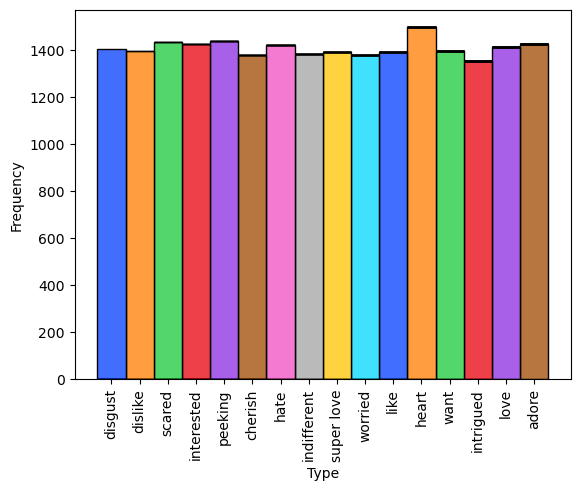

In [13]:
sns.histplot(data=df, x='Type', hue='Type', palette='bright', multiple='stack')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend().remove()
plt.show()

In [14]:
df.to_csv(r"D:\data analyst\projects & internships\0.  internships scn n enroll\2. Accenture\Cleaned Reactions.csv", index=False)
